# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [95]:
# Initial imports
import os
import pandas as pd

import nltk
nltk.download('vader_lexicon')
    
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/JiapingBian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [96]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [97]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [98]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3640


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [99]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1378


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [100]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000


In [101]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [102]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.145479,0.077564,0.044128,0.878298
std,0.477129,0.067234,0.069578,0.086050
min,-0.865800,0.000000,0.000000,0.588000
25%,-0.116100,0.007000,0.000000,0.814500
50%,0.271400,0.085500,0.000000,0.908000
75%,0.507000,0.101500,0.088750,0.915000
max,0.923100,0.326000,0.294000,1.000000


In [103]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.141825,0.069547,0.035442,0.895000
std,0.402940,0.068289,0.066063,0.086984
min,-0.910000,0.000000,0.000000,0.607000
25%,0.000000,0.000000,0.000000,0.842000
50%,0.177900,0.068000,0.000000,0.909000
75%,0.411700,0.103500,0.063000,0.956500
max,0.851900,0.311000,0.347000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher mean positive score compared to Ethereum (0.0776 for Bitcoin and 0.0694 for Ethereum). 

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score (0.9231). 

Q. Which coin had the highest positive score?

A: Bitcoin has the highest compound score (0.326). 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [105]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [111]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

sw = stopwords.words('english')
print(sw)

regex = re.compile("[^a-zA-Z ]")
print(regex)

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JiapingBian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/JiapingBian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/JiapingBian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
# added customized char
# sw = sw.append('char')

In [112]:
# Complete the tokenizer function
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Remove the stop words
    # Remove the punctuation
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the stop words
    # Lemmatize Words into root words
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lower_words = [w.lower() for w in words if w.lower() not in sw]
    lem_tokens = [lemmatizer.lemmatize(word) for word in lower_words]
    
    return lem_tokens

In [114]:
bitcoin_df["text"][0]
tokenizer(bitcoin_df["text"][0])

['two',
 'alleged',
 'crypto',
 'trader',
 'singapore',
 'apparently',
 'came',
 'foolproof',
 'plan',
 'rather',
 'convert',
 'customer',
 'singapore',
 'dollar',
 'bitcoin',
 'would',
 'simply',
 'rob',
 'victim',
 'came',
 'char']

In [115]:
# Create a new tokens column for bitcoin

bitcoin_tokens = []

for text in bitcoin_df['text']:
    # get all for each article, which is already sentence tokenized
    words = tokenizer(text)
    # append all words for each article to the word_tokenized list
    bitcoin_tokens.append(words)

bitcoin_df['tokens'] = bitcoin_tokens

# bitcoin_df.drop_duplicates()
bitcoin_df.head()
    

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840,"[two, alleged, crypto, trader, singapore, appa..."
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000,"[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937,"[covid, pandemic, resulted, mass, shift, worki..."
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagoslondon, reuters, four, month, ago, abola..."
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagoslondon, reuters, four, month, ago, abola..."


In [116]:
# Create a new tokens column for ethereum

ethereum_tokens = []

for text in ethereum_df['text']:
    # get all for each article, which is already sentence tokenized
    words = tokenizer(text)
    # append all words for each article to the word_tokenized list
    ethereum_tokens.append(words)

ethereum_df['tokens'] = ethereum_tokens
ethereum_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000,"[tldr, complete, stock, cryptocurrency, invest..."
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000,"[september, min, readopinions, expressed, entr..."
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819,"[london, reuters, sound, like, surefire, bet, ..."
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [117]:
from collections import Counter
from nltk import ngrams
import numpy as np 

In [118]:
# Generate the Bitcoin N-grams where N=2

all_bitcoin_tokens = []
for item in bitcoin_df.tokens.to_list():
    all_bitcoin_tokens += item

bitcoin_bigram_counts = Counter(ngrams(all_bitcoin_tokens, n=2))

# N-gram of the all articles
print(dict(bitcoin_bigram_counts.most_common(10)))

{('satoshi', 'nakaboto'): 42, ('char', 'robot'): 21, ('robot', 'colleague'): 21, ('colleague', 'satoshi'): 21, ('nakaboto', 'writes'): 21, ('writes', 'bitcoin'): 21, ('every', 'fucking'): 21, ('fucking', 'daywelcome'): 21, ('daywelcome', 'another'): 21, ('another', 'edition'): 21}


In [119]:
# Generate the Ethereum N-grams where N=2
all_ethereum_tokens = []
for item in ethereum_df.tokens.to_list():
    all_ethereum_tokens += item

ethereum_bigram_counts = Counter(ngrams(all_ethereum_tokens, n=2))

# N-gram of the all articles
print(dict(ethereum_bigram_counts.most_common(10)))

{('char', 'ethereum'): 11, ('decentralized', 'finance'): 10, ('finance', 'defi'): 8, ('ethereum', 'blockchain'): 6, ('char', 'bitcoin'): 6, ('ethereum', 'classic'): 6, ('around', 'utc'): 5, ('ethereum', 'miner'): 5, ('ether', 'char'): 4, ('smart', 'contract'): 4}


In [120]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [121]:
# Get the top 10 words for Bitcoin
token_count(all_bitcoin_tokens, N=10)

[('char', 94),
 ('bitcoin', 93),
 ('satoshi', 42),
 ('nakaboto', 42),
 ('every', 23),
 ('going', 23),
 ('another', 22),
 ('edition', 22),
 ('robot', 21),
 ('colleague', 21)]

In [122]:
# Get the top 10 words for Ethereum
token_count(all_ethereum_tokens, N=10)

[('char', 95),
 ('ethereum', 63),
 ('bitcoin', 22),
 ('blockchain', 20),
 ('cryptocurrency', 15),
 ('decentralized', 15),
 ('defi', 15),
 ('network', 14),
 ('crypto', 12),
 ('exchange', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [128]:
def process_text(text):
    output = tokenizer(text)
    return ' '.join(output)

# Process text for wordcloud creation
bitcoin_corpus = bitcoin_df.text
bitcoin_big_string = ' '.join(bitcoin_corpus)
bitcoin_input_text = process_text(bitcoin_big_string)

ethereum_corpus = ethereum_df.text
ethereum_big_string = ' '.join(ethereum_corpus)
ethereum_input_text = process_text(ethereum_big_string)


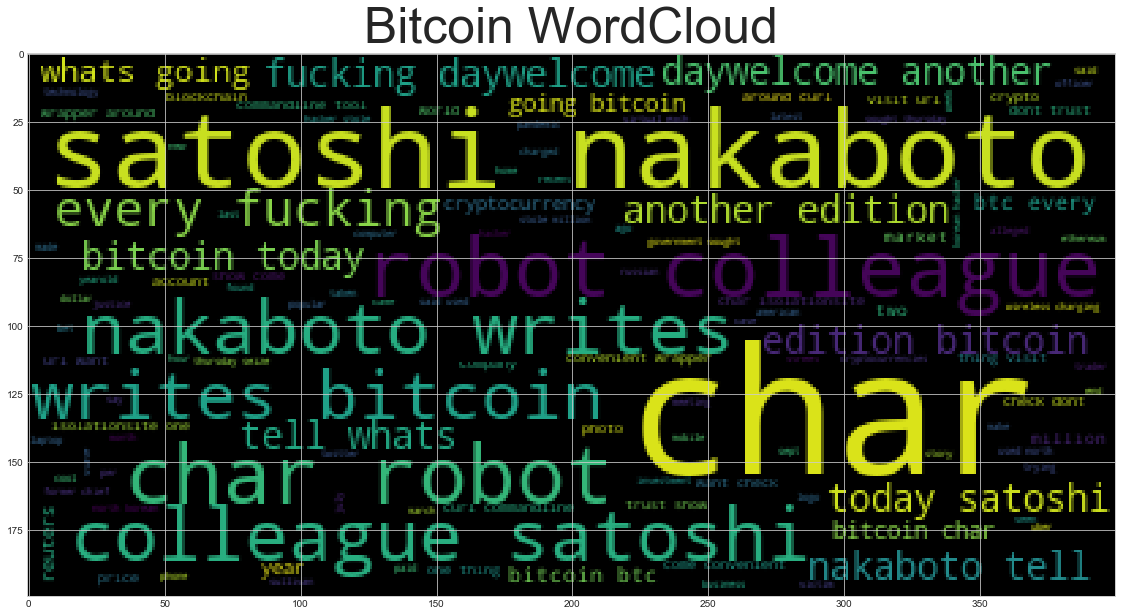

In [137]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_input_text)
plt.title("Bitcoin WordCloud", size=50)
plt.imshow(bitcoin_wc)
plt.savefig("wcb.png")

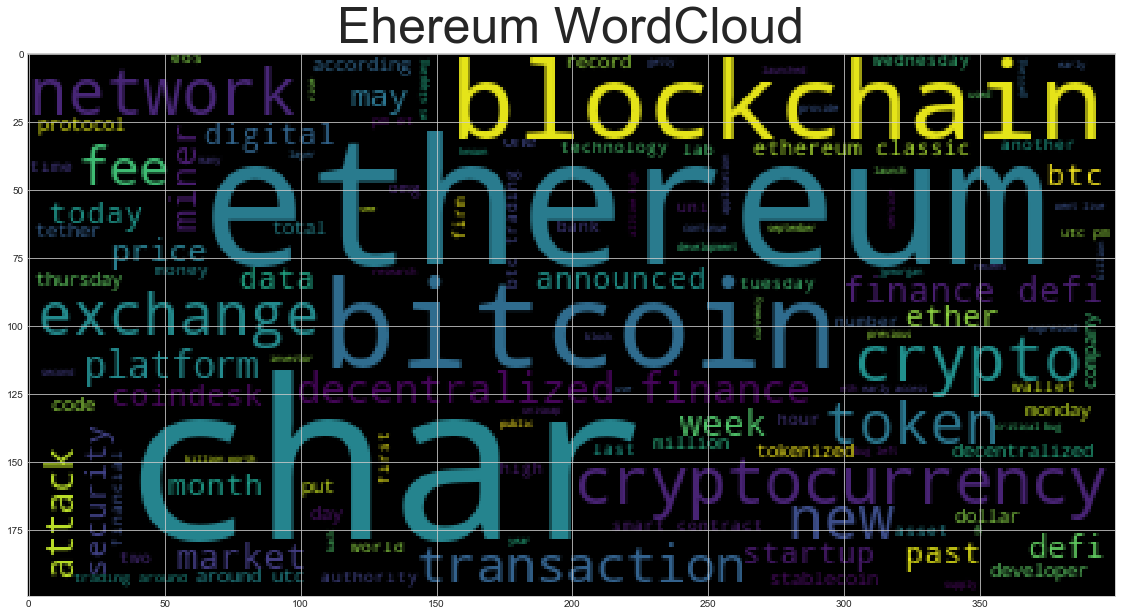

In [138]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_input_text)
plt.title("Ehereum WordCloud", size=50)
plt.imshow(ethereum_wc)
plt.savefig("wce.png")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
bitcoin_big_string

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars] By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars] “The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars] LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars] LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustlin

In [33]:
# Run the NER processor on all of the text
doc_bitcoin = nlp(bitcoin_big_string)
displacy.render(doc_bitcoin, style='ent')

# Add a title to the document
doc_bitcoin.user_data["title"] = "Bitcoin NER"
# displacy.serve(doc_bitcoin, style="ent")

In [34]:
# Render the visualization
displacy.render(doc_bitcoin, style='ent')

In [36]:
# List all Entities
entities = [ent.text for ent in doc_bitcoin.ents if ent.label_ in ['GPE', 'ORG']]
entities

['Singapore',
 'bitcoin',
 'Nigeria',
 'South Africa',
 'Kenya',
 'LAGOS/LONDON',
 'Reuters',
 'Abolaji Odunjo',
 'Lagos',
 'LAGOS/LONDON',
 'Reuters',
 'Abolaji Odunjo',
 'Lagos',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Blockfolio',
 'FTX',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin'

---

## Ethereum NER

In [37]:
# Concatenate all of the bitcoin text together
ethereum_big_string

'If you\'ve interacted with cryptocurrencies in the past couple of years, there\'s a good chance you\'ve used MetaMask. It\'s a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars] September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee bl

In [39]:
# Run the NER processor on all of the text
doc_ethereum = nlp(ethereum_big_string)

# Add a title to the document
doc_ethereum.user_data["title"] = "Ethereum NER"

In [40]:
# Render the visualization
displacy.render(doc_ethereum, style='ent')

In [42]:
# List all Entities
entities_eth = [ent.text for ent in doc_ethereum.ents if ent.label_ in ['GPE', 'ORG']]
entities_eth

['The Complete Stock and Cryptocurrency Investment Toolkit Bundle',
 'Ethereum',
 'ETH',
 'LONDON',
 'Reuters',
 'Reuters',
 'Brooklyn',
 'ConsenSys',
 'JPMorgan Chase &amp',
 'Bitcoin',
 'BTC',
 'UNUS SED LEO',
 'LEO',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'bitcoin',
 'Deloitte',
 'KPMG',
 'Fidelity',
 'Uniswap',
 'UNI',
 'Ethereum',
 'bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Ethereum (ETH',
 'The Securities and Exchange Commission',
 'Unikrn',
 'Unikrn',
 'UnikoinGold',
 'working dynamics',
 'bitcoin',
 'BTC',
 'BTC',
 'EY',
 'Microsoft',
 'ConsenSys',
 'AMD',
 'ul><li',
 'Bitcoin',
 'BTC',
 'AR',
 'AI',
 'Ethereum 2.0',
 'CoinDesk Research',
 'Ethereum',
 'Ethereum (',
 'DeFi',
 'Bitcoin',
 'Bitcoin',
 'BTC',
 'Bitcoin',
 'Bitcoin',
 'BTC',
 'Bitcoin',
 'DeFi',
 'Bitcoin',
 'BTC',
 'Ethereum 2.0',
 'CoinDesk Research',
 'U.S.',
 'DEFI',
 'INX',
 'Tron to Ethereum',
 'bitcoin',
 'Blockchai',
 'JPMorgan Chase',
 'ConsenSys',
 'Brooklyn',
 'JPMorgan',
 'un',
 'DeFi',
 't

In [139]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]

# lower and join each entity for word cloud creation
entities_eth = [i.lower().replace(' ', '_') for i in entities_eth]

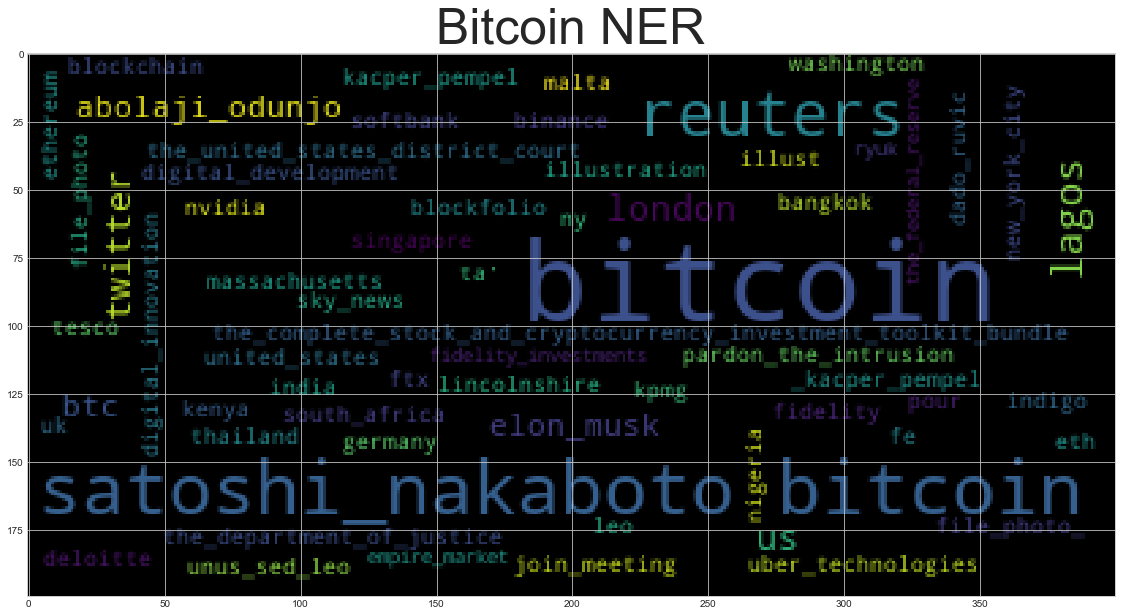

In [142]:
wcb_ent = WordCloud().generate(' '.join(entities))
plt.title("Bitcoin NER", size=50)
plt.imshow(wcb_ent)
plt.savefig("wcb_ent.png")

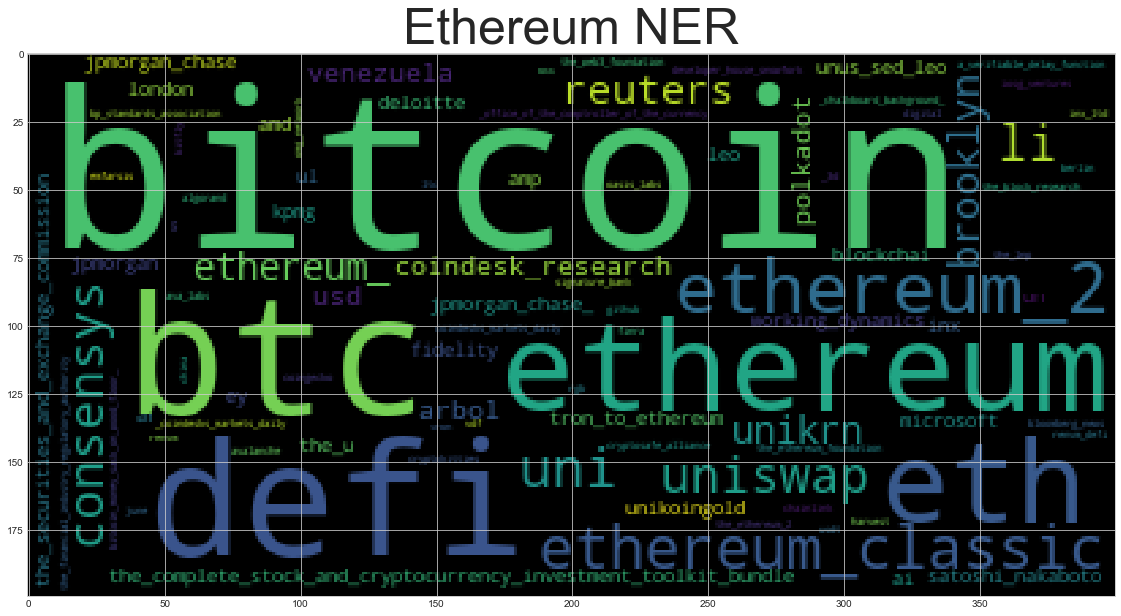

In [143]:
wce_ent = WordCloud().generate(' '.join(entities_eth))
plt.title("Ethereum NER", size=50)
plt.imshow(wce_ent)
plt.savefig("wce_ent.png")